#Segmentación de clientes de centros comerciales.
 técnica de aprendizaje automático no supervisado (KMeans Clustering Algorithm).

importamos librerías

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.cluster as cluster


In [ ]:
data = pd.read_csv("/content/sample_data/Mall_Customers.csv")
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


#renombramos las variables para trabajar mejor

In [ ]:
data.rename(columns={'Annual Income (k$)' : 'Income', 'Spending Score (1-100)' : 'Spending_Score'}, inplace = True)
data.head()

,CustomerID,Gender,Age,Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


estadistica descriptiva

In [ ]:
data.describe()

,CustomerID,Age,Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


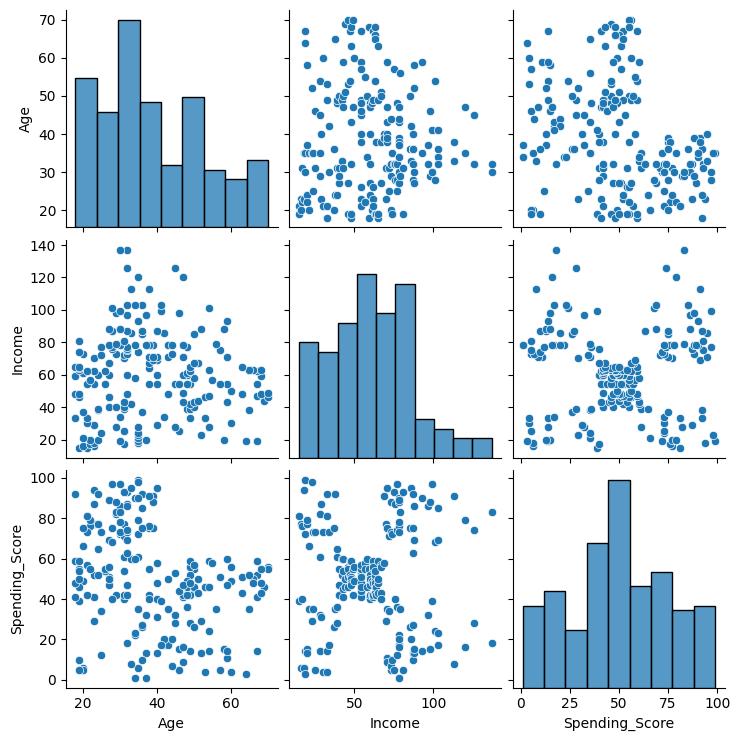

In [ ]:
sns.pairplot(data[['Age','Income', 'Spending_Score']])      #viasualizamos la correlación entrea las variables

K-Mean Clustering con 5 Clusters

In [ ]:
# probaremos 2 variables
kmeans = cluster.KMeans(n_clusters=5 ,init="k-means++")
kmeans = kmeans.fit(data[['Spending_Score','Income']])

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
kmeans.cluster_centers_

array([[49.51851852, 55.2962963 ],
       [82.12820513, 86.53846154],
       [20.91304348, 26.30434783],
       [79.36363636, 25.72727273],
       [17.11428571, 88.2       ]])

In [ ]:
data['Clusters'] = kmeans.labels_         #agregamos la columna 'clusters' en nuetro dataframe

In [ ]:
data.head()

,CustomerID,Gender,Age,Income,Spending_Score,Clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,3
2,3,Female,20,16,6,2
3,4,Female,23,16,77,3
4,5,Female,31,17,40,2


In [ ]:
data['Clusters'].value_counts()                        #contamos la cantidad de elementos por clusters

0    81
1    39
4    35
2    23
3    22
Name: Clusters, dtype: int64

In [ ]:
data.to_csv('customer_clusters.csv', index = False)         #exportamos los datos con los clusters

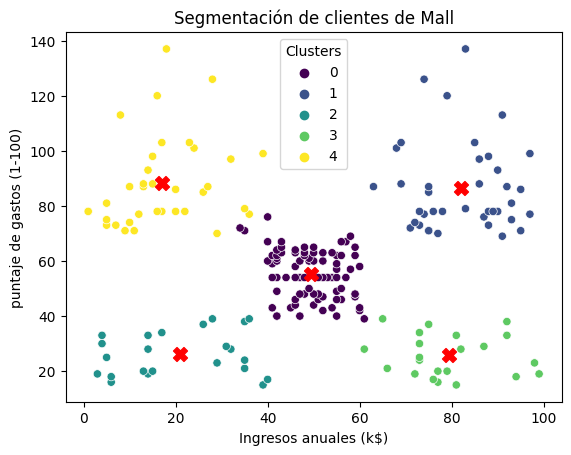

In [ ]:
#visualizamos los clusters
sns.scatterplot(x="Spending_Score", y="Income",hue = 'Clusters', palette='viridis', data=data)
plt.xlabel('Ingresos anuales (k$)')
plt.ylabel('puntaje de gastos (1-100)')
plt.title('Segmentación de clientes del Mall')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], marker='X', color='red', s=100)